# generative model of PGs 

In [1]:
from brian2 import *
%matplotlib inline
from brian2 import SpikeGeneratorGroup
import numpy as np

import random
import pandas as pd

In [168]:
N = 10
n_PGs = 10
duration = 1000*ms
PGs = {}
a = np.arange(N)
adress = []

cmap = plt.cm.get_cmap("plasma")
color_dict = pd.Series({i:cmap(i/len(a)) for i,k in enumerate(a)})

for i in range(n_PGs) :
    n_indice = np.random.randint(2, N+2, size = 1)
    indices = random.sample(range(N), int(n_indice))
    times = np.random.rand(int(n_indice))*100*ms
            
    G = SpikeGeneratorGroup(10, indices, times)
    S = SpikeMonitor(G)
            
    run(duration)
                
    t = S.t/ms
    I = S.i
    PGs[i] = (t, I)
    
    spike_trains[i] = S.spike_trains()

In [170]:
adress = []
for i in range(n_PGs) : 
    adress.append(spike_trains[i])
    
spike_per_N = {
    k: [d.get(k) for d in adress]
    for k in set().union(*adress)
}

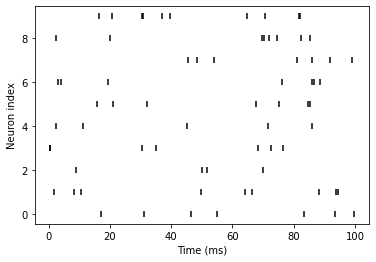

In [41]:
for i in PGs:
    plt.scatter(PGs[i][0], PGs[i][1], color = "k", marker = "|")
    xlabel('Time (ms)')
    ylabel('Neuron index');

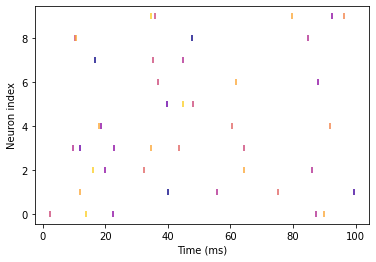

In [4]:
for i in PGs:
    plt.scatter(PGs[i][0], PGs[i][1], color = color_dict[i], marker = "|")
    xlabel('Time (ms)')
    ylabel('Neuron index');

In [105]:
last_t = []
last_i = []
for i in PGs : 
    last_t.append(PGs[i][0][-1][-1])
    last_i.append(PGs[i][1][-1])

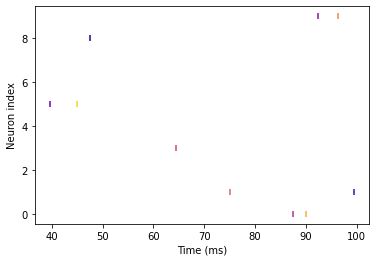

In [111]:
for i in PGs:
    plt.scatter(last_t[i], last_i[i], color = color_dict[i], marker = "|")
    xlabel('Time (ms)')
    ylabel('Neuron index');

# neural network model for learning PGs 

In [188]:
import torch 
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
from torchsummary import summary

In [189]:
n = 10 
k = 5 

In [190]:
class LogisticRegressionModel(torch.nn.Module):
    
    def __init__(self, n, k, bias=True): # (self, input_dim, output_dim)
        super(LogisticRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(n, k, bias=bias) 
        self.nl = torch.nn.Sigmoid()

    def forward(self, x):
        return self.nl(self.linear(x))

In [191]:
logistic_model =  LogisticRegressionModel(n, k)

In [196]:
class Node:
    def __init__(self, value, next_node=None):
        self.value = value
        self.next_node = next_node
    
    def set_next_node(self, next_node):
        self.next_node = next_node
    
    def get_next_node(self):
        return self.next_node
  
    def get_value(self):
        return self.value
    
n2 = Node(logistic_model, None)    
n1 = Node(spike_per_N[0], n2)


TypeError: __init__() missing 1 required positional argument: 'value'